RMSE: 4145.83


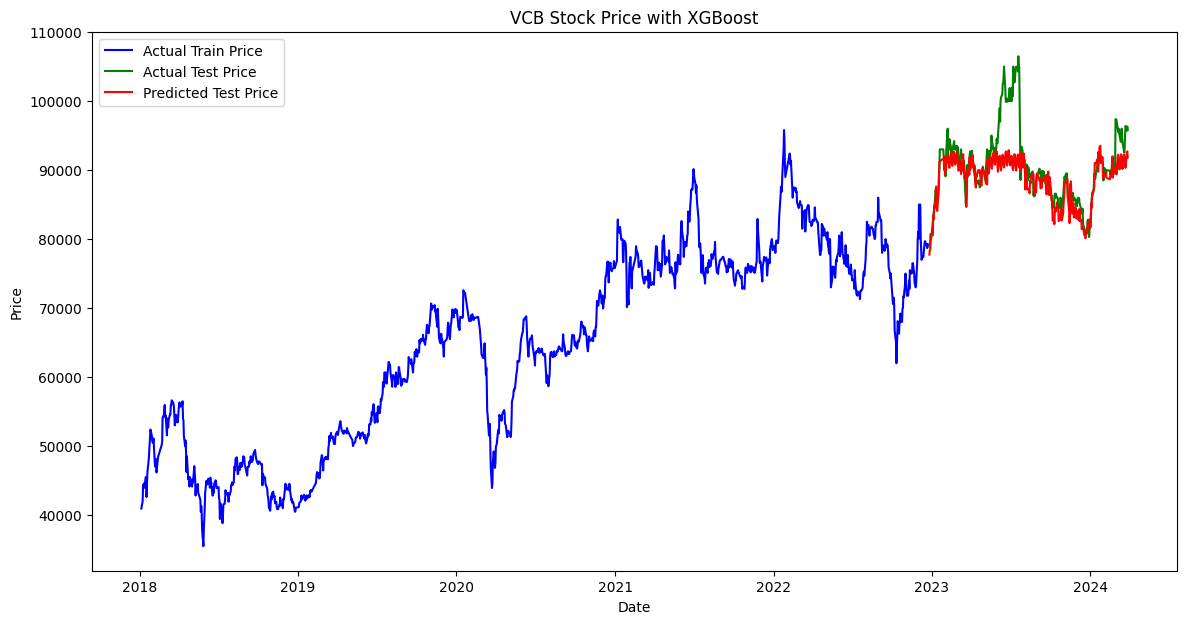

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Giả sử bạn đã tải dữ liệu vào DataFrame df
df = pd.read_csv('/content/VCB Historical Data.csv')

# Đổi kiểu dữ liệu cột Date và đặt Index
df['Date'] = pd.to_datetime(df['Date'])

# Chuyển đổi các cột khác sang dạng số nếu cần thiết
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
df.sort_values(by='Date', inplace=True)

# Tạo các đặc trưng thời gian từ cột Date
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

# Tạo các đặc trưng lag để bắt các mẫu trong quá khứ
df['price_lag1'] = df['Price'].shift(1)
df['price_lag2'] = df['Price'].shift(2)
df['price_lag3'] = df['Price'].shift(3)

# Loại bỏ các hàng có giá trị NaN do việc tạo đặc trưng lag
df.dropna(inplace=True)

# Chọn các đặc trưng và nhãn (label)
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = df[features]
y = df['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Chuyển đổi dữ liệu sang định dạng DMatrix của XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Định nghĩa tham số cho mô hình XGBoost
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Mục tiêu hồi quy
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Số vòng lặp huấn luyện
num_round = 100

# Huấn luyện mô hình
bst = xgb.train(params, dtrain, num_round)

# Dự đoán trên tập kiểm tra
y_pred = bst.predict(dtest)

# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')


plt.figure(figsize=(14, 7))

# Vẽ tập huấn luyện
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Actual Train Price', color='blue')

# Vẽ tập kiểm tra
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Actual Test Price', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted Test Price', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('VCB Stock Price with XGBoost')
plt.legend()
plt.show()

RMSE: 3466.83


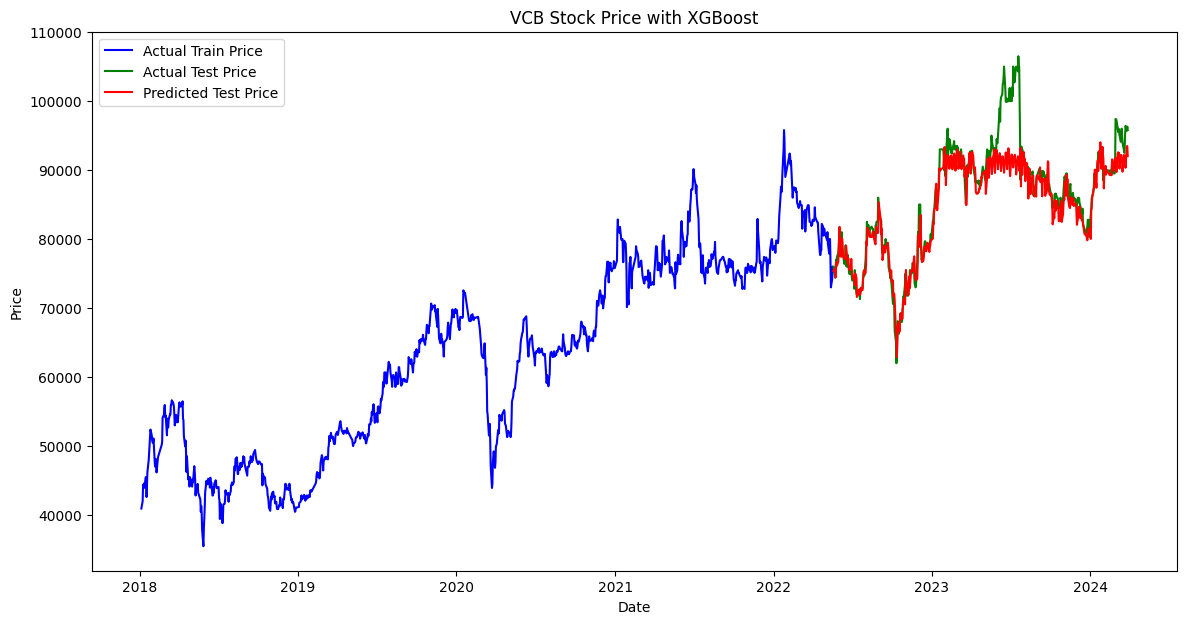

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Giả sử bạn đã tải dữ liệu vào DataFrame df
df = pd.read_csv('/content/VCB Historical Data.csv')

# Đổi kiểu dữ liệu cột Date và đặt Index
df['Date'] = pd.to_datetime(df['Date'])

# Chuyển đổi các cột khác sang dạng số nếu cần thiết
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
df.sort_values(by='Date', inplace=True)

# Tạo các đặc trưng thời gian từ cột Date
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

# Tạo các đặc trưng lag để bắt các mẫu trong quá khứ
df['price_lag1'] = df['Price'].shift(1)
df['price_lag2'] = df['Price'].shift(2)
df['price_lag3'] = df['Price'].shift(3)

# Loại bỏ các hàng có giá trị NaN do việc tạo đặc trưng lag
df.dropna(inplace=True)

# Chọn các đặc trưng và nhãn (label)
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = df[features]
y = df['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Chuyển đổi dữ liệu sang định dạng DMatrix của XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Định nghĩa tham số cho mô hình XGBoost
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Mục tiêu hồi quy
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Số vòng lặp huấn luyện
num_round = 100

# Huấn luyện mô hình
bst = xgb.train(params, dtrain, num_round)

# Dự đoán trên tập kiểm tra
y_pred = bst.predict(dtest)

# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')


plt.figure(figsize=(14, 7))

# Vẽ tập huấn luyện
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Actual Train Price', color='blue')

# Vẽ tập kiểm tra
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Actual Test Price', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted Test Price', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('VCB Stock Price with XGBoost')
plt.legend()
plt.show()

RMSE: 1426.46


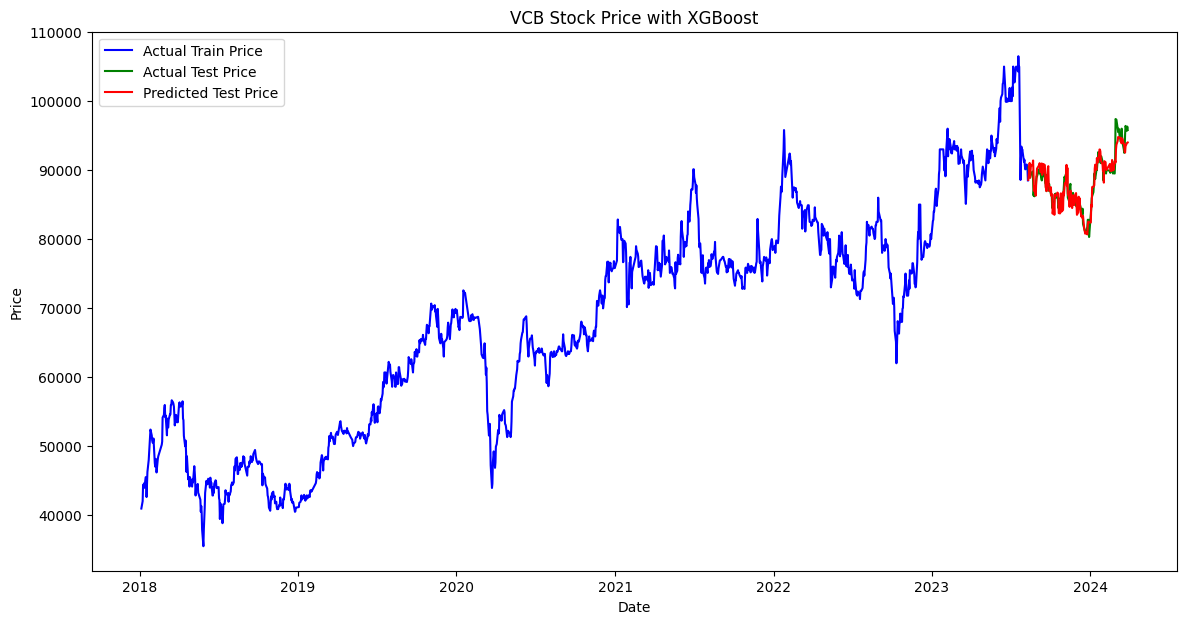

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Giả sử bạn đã tải dữ liệu vào DataFrame df
df = pd.read_csv('/content/VCB Historical Data.csv')

# Đổi kiểu dữ liệu cột Date và đặt Index
df['Date'] = pd.to_datetime(df['Date'])

# Chuyển đổi các cột khác sang dạng số nếu cần thiết
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
df.sort_values(by='Date', inplace=True)

# Tạo các đặc trưng thời gian từ cột Date
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

# Tạo các đặc trưng lag để bắt các mẫu trong quá khứ
df['price_lag1'] = df['Price'].shift(1)
df['price_lag2'] = df['Price'].shift(2)
df['price_lag3'] = df['Price'].shift(3)

# Loại bỏ các hàng có giá trị NaN do việc tạo đặc trưng lag
df.dropna(inplace=True)

# Chọn các đặc trưng và nhãn (label)
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = df[features]
y = df['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Chuyển đổi dữ liệu sang định dạng DMatrix của XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Định nghĩa tham số cho mô hình XGBoost
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Mục tiêu hồi quy
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Số vòng lặp huấn luyện
num_round = 100

# Huấn luyện mô hình
bst = xgb.train(params, dtrain, num_round)

# Dự đoán trên tập kiểm tra
y_pred = bst.predict(dtest)

# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')


plt.figure(figsize=(14, 7))

# Vẽ tập huấn luyện
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Actual Train Price', color='blue')

# Vẽ tập kiểm tra
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Actual Test Price', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted Test Price', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('VCB Stock Price with XGBoost')
plt.legend()
plt.show()

RMSE: 2027.27


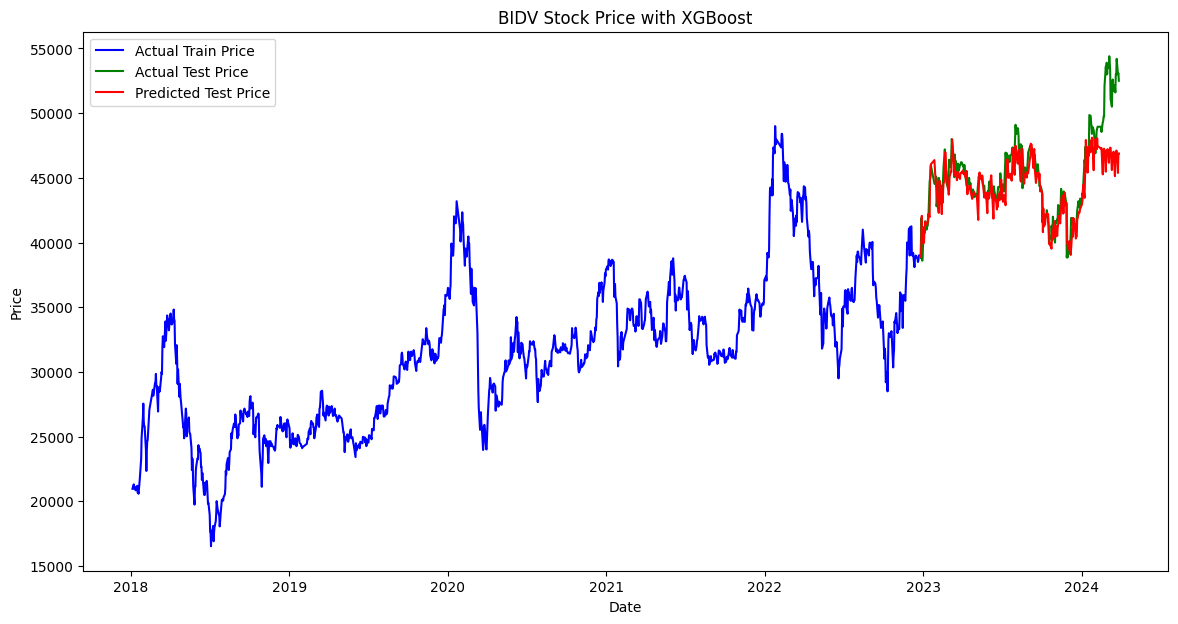

In [ ]:


# Giả sử bạn đã tải dữ liệu vào DataFrame df
dfbid = pd.read_csv('/content/BID Historical Data.csv')

# Đổi kiểu dữ liệu cột Date và đặt Index
dfbid['Date'] = pd.to_datetime(dfbid['Date'])

# Chuyển đổi các cột khác sang dạng số nếu cần thiết
dfbid['Price'] = dfbid['Price'].str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
dfbid.sort_values(by='Date', inplace=True)

# Tạo các đặc trưng thời gian từ cột Date
dfbid['day'] = dfbid['Date'].dt.day
dfbid['month'] = dfbid['Date'].dt.month
dfbid['year'] = dfbid['Date'].dt.year
dfbid['day_of_week'] = dfbid['Date'].dt.dayofweek

# Tạo các đặc trưng lag để bắt các mẫu trong quá khứ
dfbid['price_lag1'] = dfbid['Price'].shift(1)
dfbid['price_lag2'] = dfbid['Price'].shift(2)
dfbid['price_lag3'] = dfbid['Price'].shift(3)

# Loại bỏ các hàng có giá trị NaN do việc tạo đặc trưng lag
dfbid.dropna(inplace=True)

# Chọn các đặc trưng và nhãn (label)
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = dfbid[features]
y = dfbid['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Chuyển đổi dữ liệu sang định dạng DMatrix của XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Định nghĩa tham số cho mô hình XGBoost
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Mục tiêu hồi quy
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Số vòng lặp huấn luyện
num_round = 100

# Huấn luyện mô hình
bst = xgb.train(params, dtrain, num_round)

# Dự đoán trên tập kiểm tra
y_pred = bst.predict(dtest)

# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')


plt.figure(figsize=(14, 7))

# Vẽ tập huấn luyện
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Actual Train Price', color='blue')

# Vẽ tập kiểm tra
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Actual Test Price', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted Test Price', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BIDV Stock Price with XGBoost')
plt.legend()
plt.show()

RMSE: 1792.35


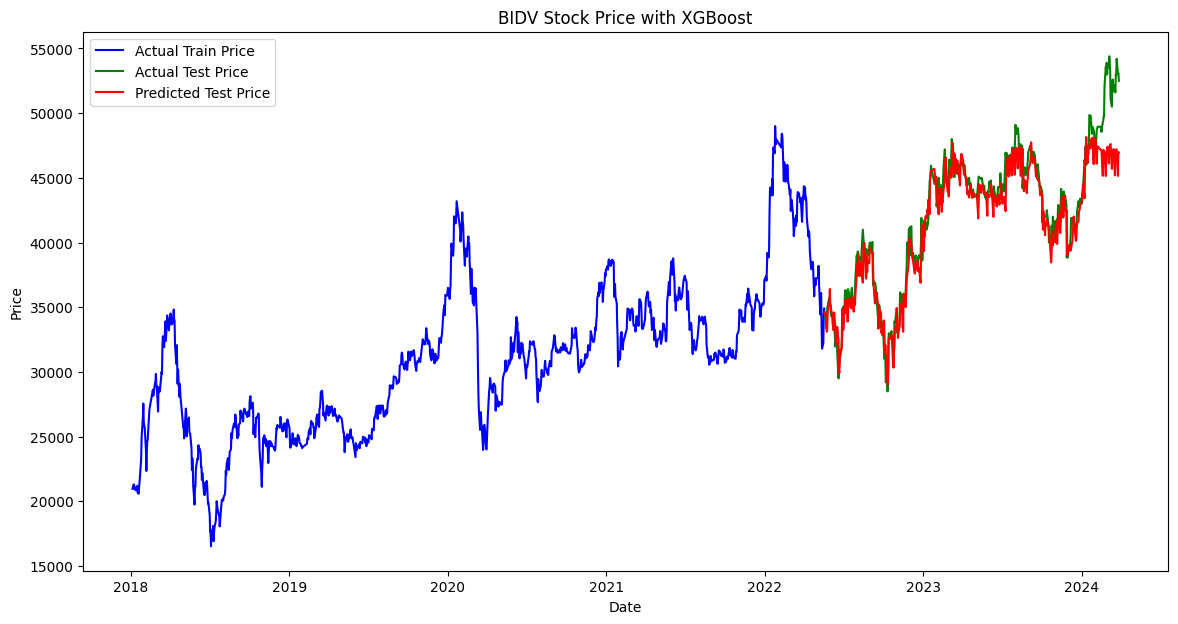

In [ ]:


# Giả sử bạn đã tải dữ liệu vào DataFrame df
dfbid = pd.read_csv('/content/BID Historical Data.csv')

# Đổi kiểu dữ liệu cột Date và đặt Index
dfbid['Date'] = pd.to_datetime(dfbid['Date'])

# Chuyển đổi các cột khác sang dạng số nếu cần thiết
dfbid['Price'] = dfbid['Price'].str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
dfbid.sort_values(by='Date', inplace=True)

# Tạo các đặc trưng thời gian từ cột Date
dfbid['day'] = dfbid['Date'].dt.day
dfbid['month'] = dfbid['Date'].dt.month
dfbid['year'] = dfbid['Date'].dt.year
dfbid['day_of_week'] = dfbid['Date'].dt.dayofweek

# Tạo các đặc trưng lag để bắt các mẫu trong quá khứ
dfbid['price_lag1'] = dfbid['Price'].shift(1)
dfbid['price_lag2'] = dfbid['Price'].shift(2)
dfbid['price_lag3'] = dfbid['Price'].shift(3)

# Loại bỏ các hàng có giá trị NaN do việc tạo đặc trưng lag
dfbid.dropna(inplace=True)

# Chọn các đặc trưng và nhãn (label)
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = dfbid[features]
y = dfbid['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Chuyển đổi dữ liệu sang định dạng DMatrix của XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Định nghĩa tham số cho mô hình XGBoost
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Mục tiêu hồi quy
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Số vòng lặp huấn luyện
num_round = 100

# Huấn luyện mô hình
bst = xgb.train(params, dtrain, num_round)

# Dự đoán trên tập kiểm tra
y_pred = bst.predict(dtest)

# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')


plt.figure(figsize=(14, 7))

# Vẽ tập huấn luyện
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Actual Train Price', color='blue')

# Vẽ tập kiểm tra
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Actual Test Price', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted Test Price', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BIDV Stock Price with XGBoost')
plt.legend()
plt.show()

RMSE: 2301.83


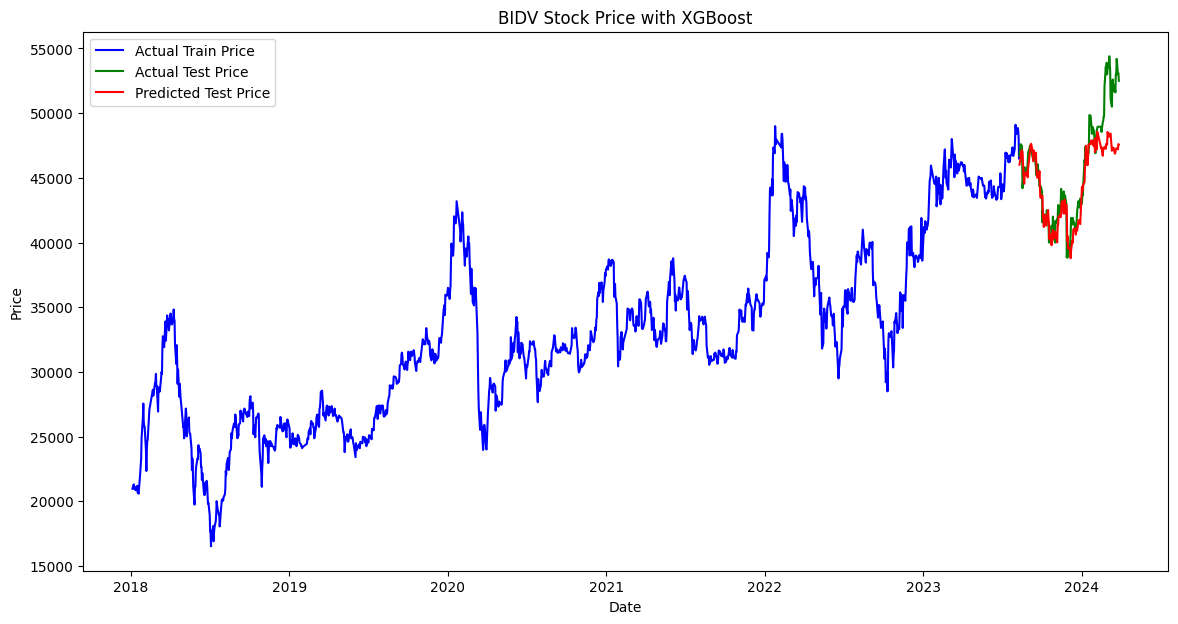

In [ ]:


# Giả sử bạn đã tải dữ liệu vào DataFrame df
dfbid = pd.read_csv('/content/BID Historical Data.csv')

# Đổi kiểu dữ liệu cột Date và đặt Index
dfbid['Date'] = pd.to_datetime(dfbid['Date'])

# Chuyển đổi các cột khác sang dạng số nếu cần thiết
dfbid['Price'] = dfbid['Price'].str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
dfbid.sort_values(by='Date', inplace=True)

# Tạo các đặc trưng thời gian từ cột Date
dfbid['day'] = dfbid['Date'].dt.day
dfbid['month'] = dfbid['Date'].dt.month
dfbid['year'] = dfbid['Date'].dt.year
dfbid['day_of_week'] = dfbid['Date'].dt.dayofweek

# Tạo các đặc trưng lag để bắt các mẫu trong quá khứ
dfbid['price_lag1'] = dfbid['Price'].shift(1)
dfbid['price_lag2'] = dfbid['Price'].shift(2)
dfbid['price_lag3'] = dfbid['Price'].shift(3)

# Loại bỏ các hàng có giá trị NaN do việc tạo đặc trưng lag
dfbid.dropna(inplace=True)

# Chọn các đặc trưng và nhãn (label)
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = dfbid[features]
y = dfbid['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Chuyển đổi dữ liệu sang định dạng DMatrix của XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Định nghĩa tham số cho mô hình XGBoost
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Mục tiêu hồi quy
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Số vòng lặp huấn luyện
num_round = 100

# Huấn luyện mô hình
bst = xgb.train(params, dtrain, num_round)

# Dự đoán trên tập kiểm tra
y_pred = bst.predict(dtest)

# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')


plt.figure(figsize=(14, 7))

# Vẽ tập huấn luyện
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Actual Train Price', color='blue')

# Vẽ tập kiểm tra
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Actual Test Price', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted Test Price', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BIDV Stock Price with XGBoost')
plt.legend()
plt.show()

RMSE: 425.11


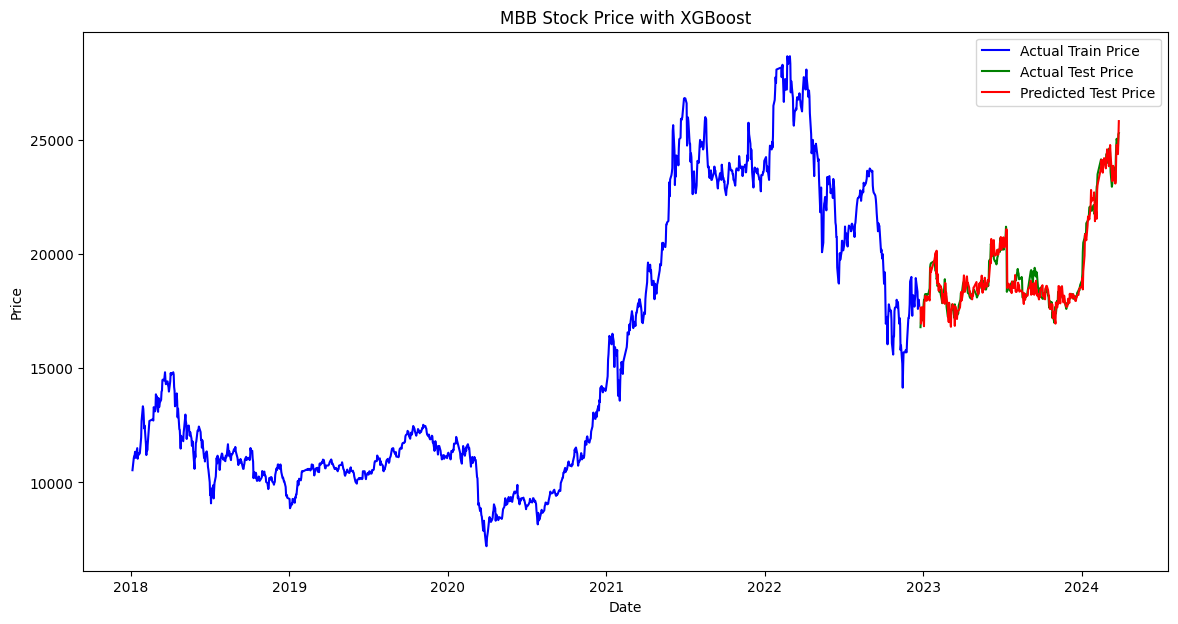

In [ ]:

# Giả sử bạn đã tải dữ liệu vào DataFrame df
dfbid = pd.read_csv('/content/MBB Historical Data.csv')

# Đổi kiểu dữ liệu cột Date và đặt Index
dfbid['Date'] = pd.to_datetime(dfbid['Date'])

# Chuyển đổi các cột khác sang dạng số nếu cần thiết
dfbid['Price'] = dfbid['Price'].str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
dfbid.sort_values(by='Date', inplace=True)

# Tạo các đặc trưng thời gian từ cột Date
dfbid['day'] = dfbid['Date'].dt.day
dfbid['month'] = dfbid['Date'].dt.month
dfbid['year'] = dfbid['Date'].dt.year
dfbid['day_of_week'] = dfbid['Date'].dt.dayofweek

# Tạo các đặc trưng lag để bắt các mẫu trong quá khứ
dfbid['price_lag1'] = dfbid['Price'].shift(1)
dfbid['price_lag2'] = dfbid['Price'].shift(2)
dfbid['price_lag3'] = dfbid['Price'].shift(3)

# Loại bỏ các hàng có giá trị NaN do việc tạo đặc trưng lag
dfbid.dropna(inplace=True)

# Chọn các đặc trưng và nhãn (label)
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = dfbid[features]
y = dfbid['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Chuyển đổi dữ liệu sang định dạng DMatrix của XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Định nghĩa tham số cho mô hình XGBoost
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Mục tiêu hồi quy
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Số vòng lặp huấn luyện
num_round = 100

# Huấn luyện mô hình
bst = xgb.train(params, dtrain, num_round)

# Dự đoán trên tập kiểm tra
y_pred = bst.predict(dtest)

# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')


plt.figure(figsize=(14, 7))

# Vẽ tập huấn luyện
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Actual Train Price', color='blue')

# Vẽ tập kiểm tra
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Actual Test Price', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted Test Price', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MBB Stock Price with XGBoost')
plt.legend()
plt.show()

RMSE: 626.85


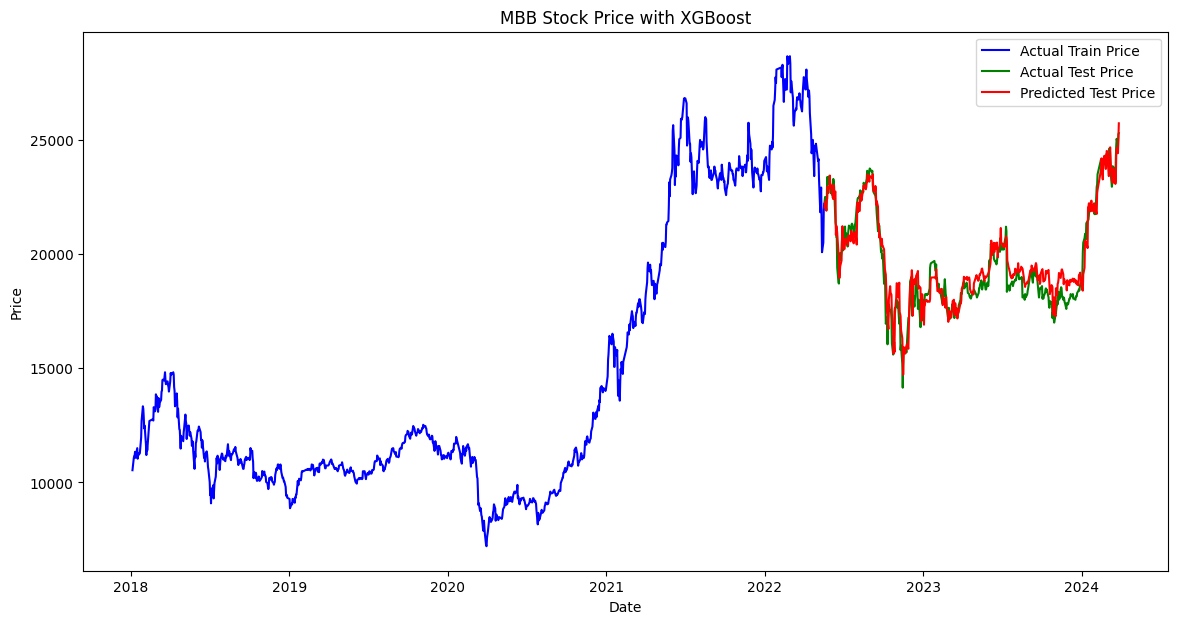

In [ ]:

# Giả sử bạn đã tải dữ liệu vào DataFrame df
dfbid = pd.read_csv('/content/MBB Historical Data.csv')

# Đổi kiểu dữ liệu cột Date và đặt Index
dfbid['Date'] = pd.to_datetime(dfbid['Date'])

# Chuyển đổi các cột khác sang dạng số nếu cần thiết
dfbid['Price'] = dfbid['Price'].str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
dfbid.sort_values(by='Date', inplace=True)

# Tạo các đặc trưng thời gian từ cột Date
dfbid['day'] = dfbid['Date'].dt.day
dfbid['month'] = dfbid['Date'].dt.month
dfbid['year'] = dfbid['Date'].dt.year
dfbid['day_of_week'] = dfbid['Date'].dt.dayofweek

# Tạo các đặc trưng lag để bắt các mẫu trong quá khứ
dfbid['price_lag1'] = dfbid['Price'].shift(1)
dfbid['price_lag2'] = dfbid['Price'].shift(2)
dfbid['price_lag3'] = dfbid['Price'].shift(3)

# Loại bỏ các hàng có giá trị NaN do việc tạo đặc trưng lag
dfbid.dropna(inplace=True)

# Chọn các đặc trưng và nhãn (label)
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = dfbid[features]
y = dfbid['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Chuyển đổi dữ liệu sang định dạng DMatrix của XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Định nghĩa tham số cho mô hình XGBoost
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Mục tiêu hồi quy
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Số vòng lặp huấn luyện
num_round = 100

# Huấn luyện mô hình
bst = xgb.train(params, dtrain, num_round)

# Dự đoán trên tập kiểm tra
y_pred = bst.predict(dtest)

# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')


plt.figure(figsize=(14, 7))

# Vẽ tập huấn luyện
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Actual Train Price', color='blue')

# Vẽ tập kiểm tra
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Actual Test Price', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted Test Price', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MBB Stock Price with XGBoost')
plt.legend()
plt.show()

RMSE: 429.89


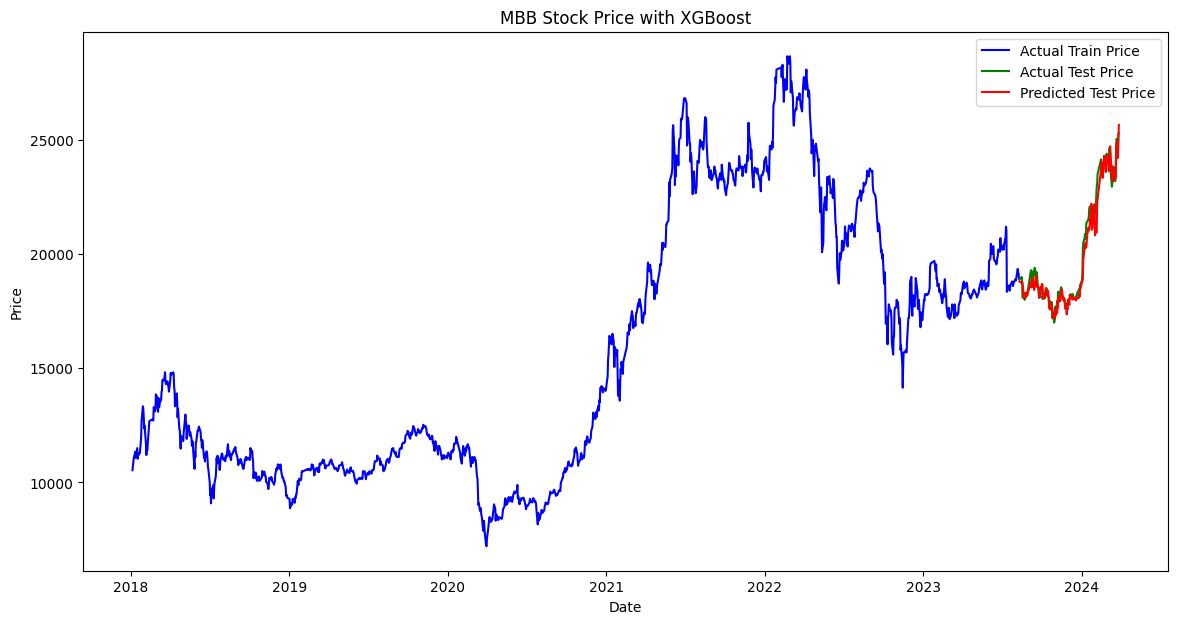

In [ ]:

# Giả sử bạn đã tải dữ liệu vào DataFrame df
dfbid = pd.read_csv('/content/MBB Historical Data.csv')

# Đổi kiểu dữ liệu cột Date và đặt Index
dfbid['Date'] = pd.to_datetime(dfbid['Date'])

# Chuyển đổi các cột khác sang dạng số nếu cần thiết
dfbid['Price'] = dfbid['Price'].str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
dfbid.sort_values(by='Date', inplace=True)

# Tạo các đặc trưng thời gian từ cột Date
dfbid['day'] = dfbid['Date'].dt.day
dfbid['month'] = dfbid['Date'].dt.month
dfbid['year'] = dfbid['Date'].dt.year
dfbid['day_of_week'] = dfbid['Date'].dt.dayofweek

# Tạo các đặc trưng lag để bắt các mẫu trong quá khứ
dfbid['price_lag1'] = dfbid['Price'].shift(1)
dfbid['price_lag2'] = dfbid['Price'].shift(2)
dfbid['price_lag3'] = dfbid['Price'].shift(3)

# Loại bỏ các hàng có giá trị NaN do việc tạo đặc trưng lag
dfbid.dropna(inplace=True)

# Chọn các đặc trưng và nhãn (label)
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = dfbid[features]
y = dfbid['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Chuyển đổi dữ liệu sang định dạng DMatrix của XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Định nghĩa tham số cho mô hình XGBoost
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Mục tiêu hồi quy
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Số vòng lặp huấn luyện
num_round = 100

# Huấn luyện mô hình
bst = xgb.train(params, dtrain, num_round)

# Dự đoán trên tập kiểm tra
y_pred = bst.predict(dtest)

# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')


plt.figure(figsize=(14, 7))

# Vẽ tập huấn luyện
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Actual Train Price', color='blue')

# Vẽ tập kiểm tra
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Actual Test Price', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted Test Price', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MBB Stock Price with XGBoost')
plt.legend()
plt.show()

              Price      Open      High       Low   Vol. Change %
Date                                                             
2018-01-02  20664.3  19,516.3  20,664.3  19,286.7  3.65M    5.88%
2018-01-03  20511.2  20,664.3  20,702.5  20,281.6  3.09M   -0.74%
2018-01-04  21085.2  20,511.2  21,200.0  20,319.9  5.56M    2.80%


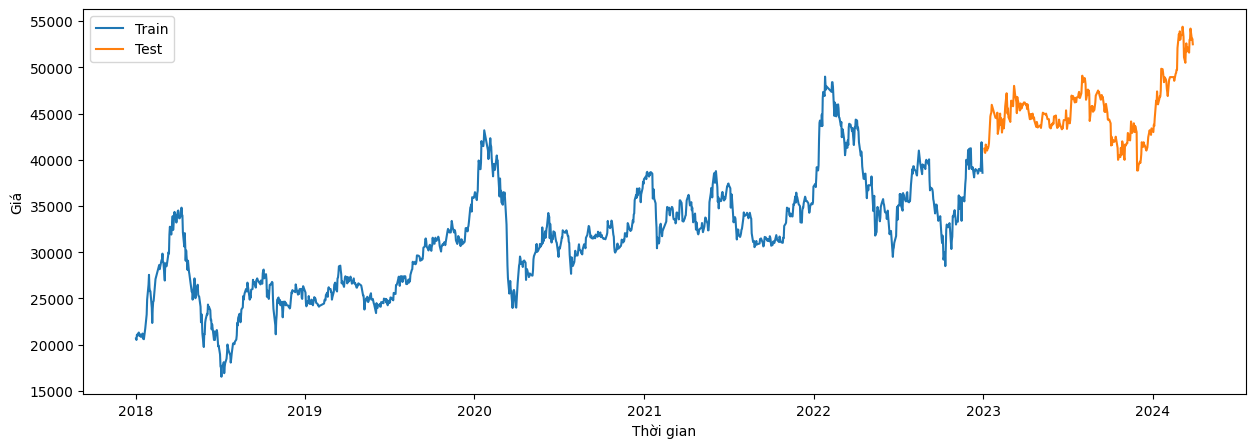

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


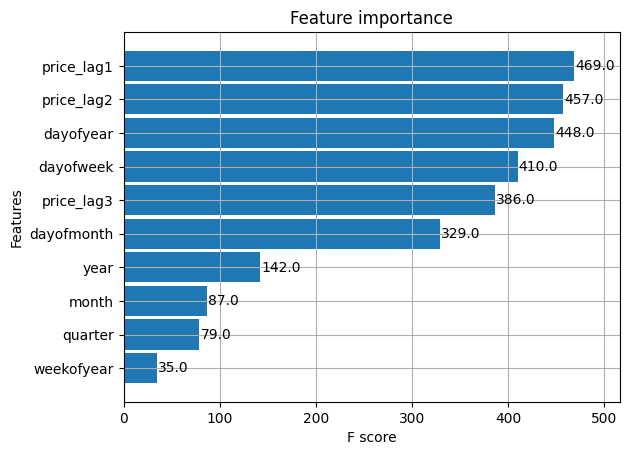

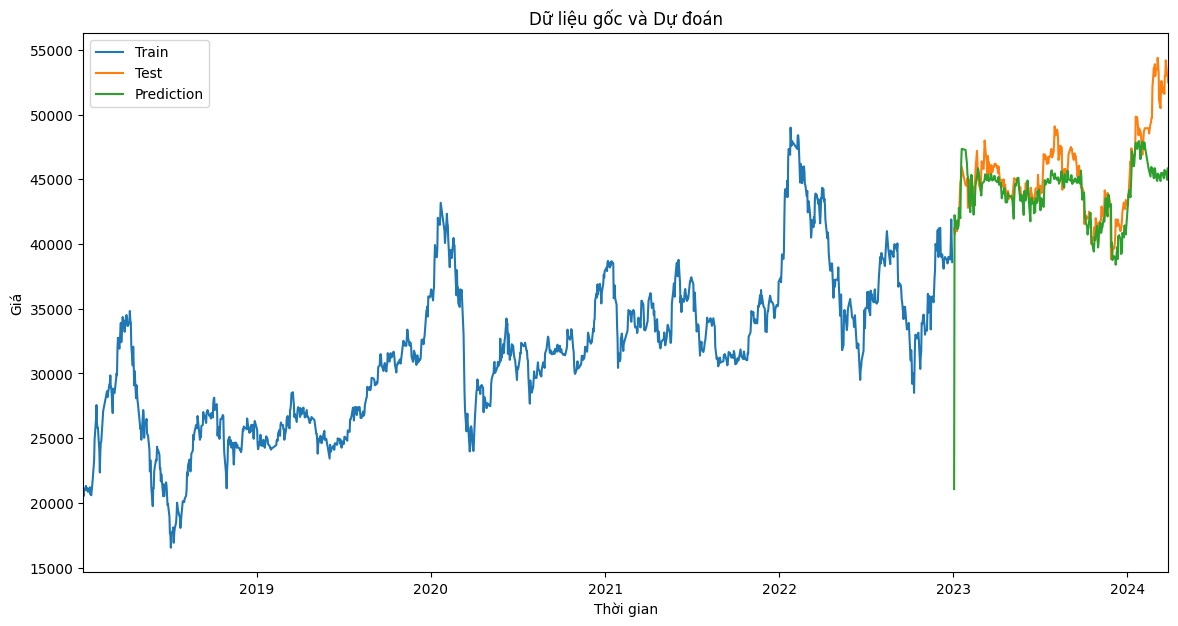

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf

# Đọc dữ liệu từ file CSV của bạn
file_path = '/content/BID Historical Data.csv'  # Thay đổi đường dẫn này để phù hợp với file của bạn
energy_hourly = pd.read_csv(file_path, index_col=[0], parse_dates=[0])
# Chuyển đổi các cột khác sang dạng số nếu cần thiết
energy_hourly['Price'] = energy_hourly['Price'].str.replace(',', '').astype(float)
# Sắp xếp chỉ số thời gian
energy_hourly.sort_index(inplace=True)

# Hiển thị vài dòng dữ liệu đầu tiên
print(energy_hourly.head(3))

# Hàm tách dữ liệu thành tập huấn luyện và kiểm tra
def split_data(data, split_date):
    return data[data.index <= split_date].copy(), \
           data[data.index >  split_date].copy()

# Tách dữ liệu thành tập huấn luyện và kiểm tra
train, test = split_data(energy_hourly, '01-Jan-2023')

# Vẽ đồ thị dữ liệu huấn luyện và kiểm tra
plt.figure(figsize=(15,5))
plt.xlabel('Thời gian')
plt.ylabel('Giá')
plt.plot(train.index, train['Price'], label='Train')
plt.plot(test.index, test['Price'], label='Test')
plt.legend()
plt.show()

# Hàm tạo các đặc trưng từ chỉ số thời gian
def create_features(df):
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    # Tạo các đặc trưng lag để bắt các mẫu trong quá khứ
    df['price_lag1'] = df['Price'].shift(1)
    df['price_lag2'] = df['Price'].shift(2)
    df['price_lag3'] = df['Price'].shift(3)

    # Tạo các đặc trưng lag để bắt các mẫu trong quá khứ

    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear', 'price_lag1', 'price_lag2', 'price_lag3']]
    return X

# Tạo các đặc trưng cho tập huấn luyện và kiểm tra
X_train, y_train = create_features(train), train.iloc[:, 0]  # Giả sử cột năng lượng là cột đầu tiên
X_test, y_test = create_features(test), test.iloc[:, 0]

# Huấn luyện mô hình XGBoost
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False)

# Vẽ biểu đồ tầm quan trọng của các đặc trưng
xgb.plot_importance(reg, height=0.9)
plt.show()

# Dự đoán và vẽ đồ thị kết quả
X_test_pred = reg.predict(X_test)

def plot_performance(base_data, date_from, date_to, title=None):
    plt.figure(figsize=(14,7))
    if title == None:
        plt.title('Từ {0} Đến {1}'.format(date_from, date_to))
    else:
        plt.title(title)
    plt.xlabel('Thời gian')
    plt.ylabel('Giá')
    plt.plot(X_train.index, y_train, label='Train')
    plt.plot(X_test.index, y_test, label='Test')
    plt.plot(X_test.index, X_test_pred, label='Prediction')
    plt.legend()
    plt.xlim(left=date_from, right=date_to)
    plt.show()

# Vẽ các biểu đồ kết quả
plot_performance(energy_hourly, energy_hourly.index[0].date(), energy_hourly.index[-1].date(), 'Dữ liệu gốc và Dự đoán')

